In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Reshape, Add, Concatenate

import matplotlib.pyplot as plt

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
print(train_labels)
print(class_names[train_labels[0]])
print(class_names[train_labels[1]])

[9 0 0 ... 3 0 5]
Ankle boot
T-shirt/top


In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

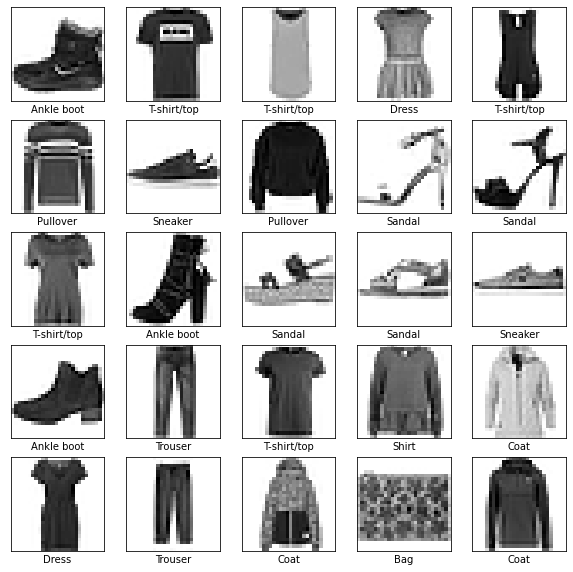

In [17]:
 plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# print(train_images[1])

In [18]:
modelA = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelA.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
modelB = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

    
])

modelB.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelB.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [21]:
modelC = tf.keras.Sequential([

    Reshape((28,28,1), input_shape=(28, 28)),
    Conv2D(32,(3,3)),
    MaxPool2D(),

    BatchNormalization(),

    Conv2D(16, (3,3)),
    MaxPool2D(),

    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10, activation='softmax')

    
])

modelC.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelC.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 16)         

In [26]:
history = modelA.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6290 - accuracy: 0.7803 - val_loss: 0.4163 - val_accuracy: 0.8503
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3864 - accuracy: 0.8608 - val_loss: 0.3919 - val_accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3363 - accuracy: 0.8770 - val_loss: 0.3655 - val_accuracy: 0.8677
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3144 - accuracy: 0.8850 - val_loss: 0.3547 - val_accuracy: 0.8722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.8912 - val_loss: 0.3470 - val_accuracy: 0.8746


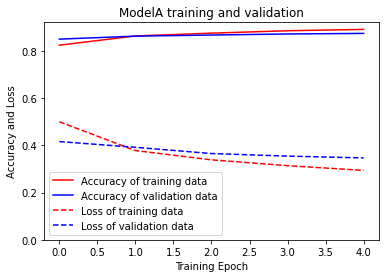

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('ModelA training and validation')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [34]:
history = modelB.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5983 - accuracy: 0.7860 - val_loss: 0.3934 - val_accuracy: 0.8627
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3633 - accuracy: 0.8643 - val_loss: 0.3802 - val_accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3298 - accuracy: 0.8771 - val_loss: 0.3540 - val_accuracy: 0.8734
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.8853 - val_loss: 0.3383 - val_accuracy: 0.8786
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2847 - accuracy: 0.8939 - val_loss: 0.3490 - val_accuracy: 0.8756


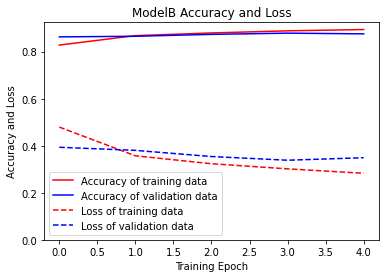

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('ModelB Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [36]:
history = modelC.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5272 - accuracy: 0.8117 - val_loss: 0.3530 - val_accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2964 - accuracy: 0.8920 - val_loss: 0.3184 - val_accuracy: 0.8847
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2528 - accuracy: 0.9054 - val_loss: 0.3034 - val_accuracy: 0.8842
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2248 - accuracy: 0.9169 - val_loss: 0.2867 - val_accuracy: 0.8964
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2029 - accuracy: 0.9242 - val_loss: 0.3196 - val_accuracy: 0.8927


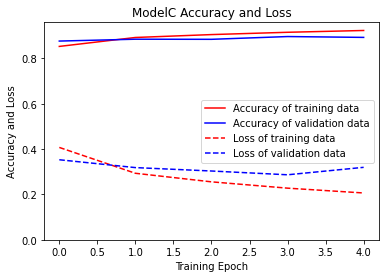

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('ModelC Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [38]:
combine = Sequential([Input((3,10)), Dense(10, activation='softmax')])
combine.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
combine.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3, 10)             110       
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.layers import concatenate

In [40]:
model_input = Input((28,28))
x1 = modelA(model_input)
x2 = modelB(model_input)
x3 = modelC(model_input)
x = concatenate([x1,x2,x3])
output = Dense(10)(x)

In [41]:
x2.shape

TensorShape([None, 10])

In [42]:
model = Model(model_input, output, name='ensembled')

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "ensembled"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 10)           101770      input_2[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 10)           235146      input_2[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 10)           57754       input_2[0][0]                    
__________________________________________________________________________________________

In [47]:
keras.utils.plot_model(model, "my_first_model.png")

NameError: ignored

In [46]:
history = model.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 1.2452 - accuracy: 0.7006 - val_loss: 0.5044 - val_accuracy: 0.8533
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4084 - accuracy: 0.8817 - val_loss: 0.3853 - val_accuracy: 0.8751
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3247 - accuracy: 0.8917 - val_loss: 0.3462 - val_accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2844 - accuracy: 0.9013 - val_loss: 0.3491 - val_accuracy: 0.8763
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2529 - accuracy: 0.9107 - val_loss: 0.3178 - val_accuracy: 0.8906


In [48]:
modelA(train_images).shape

TensorShape([60000, 10])

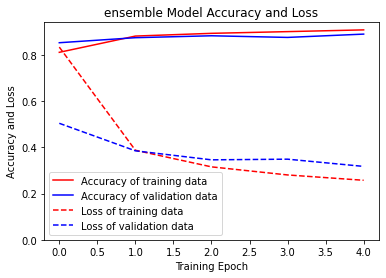

In [50]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('ensemble Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()